In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

mush = pd.read_csv("mushroom.csv")

In [2]:
mush.dtypes

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [3]:
mush = mush.drop("Unnamed: 0", axis=1)

In [4]:
mush.shape

(2000, 25)

In [5]:
mush.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


In [6]:
num_columns = mush.select_dtypes(include=[np.number])
cat_columns = mush.select_dtypes(exclude=[np.number])

In [7]:
mush.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [8]:
mush = mush[mush.duplicated()]

In [9]:
mush = mush.drop_duplicates()

In [10]:
mush.shape

(563, 25)

In [11]:
num_columns.dtypes
cat_columns.dtypes

cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
class                       object
dtype: object

In [12]:
def plot_boxplot(df, ft) :
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()


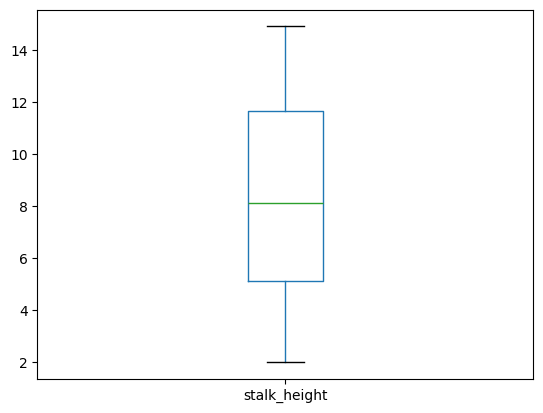

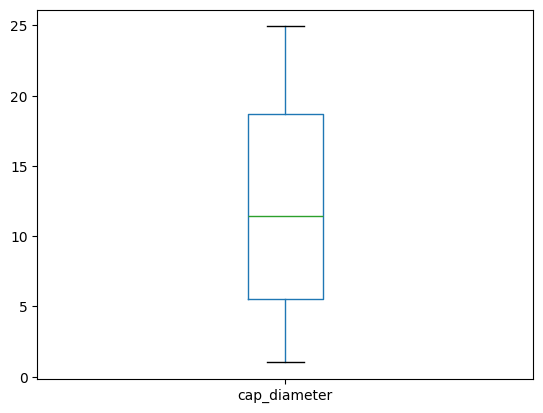

In [13]:
for ft in num_columns :
    plot_boxplot(mush,ft)

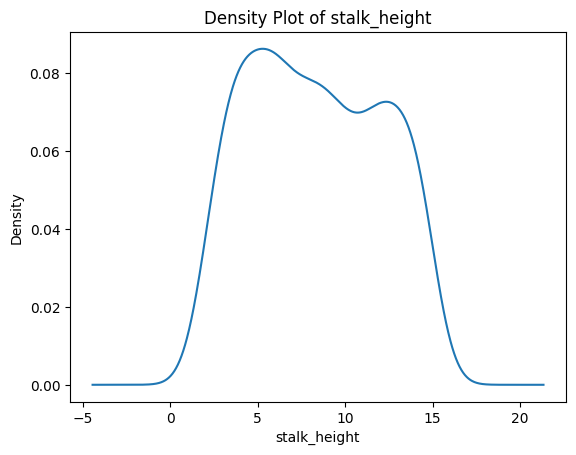

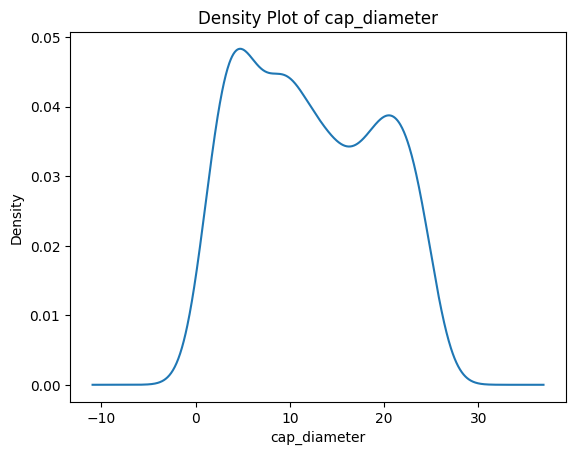

In [14]:
for col in num_columns:
  mush[col].plot.density()
  plt.xlabel(col)  # Label x-axis with current column name
  plt.title(f'Density Plot of {col}')  # Dynamic title for each plot
  plt.show()  # Display each plot

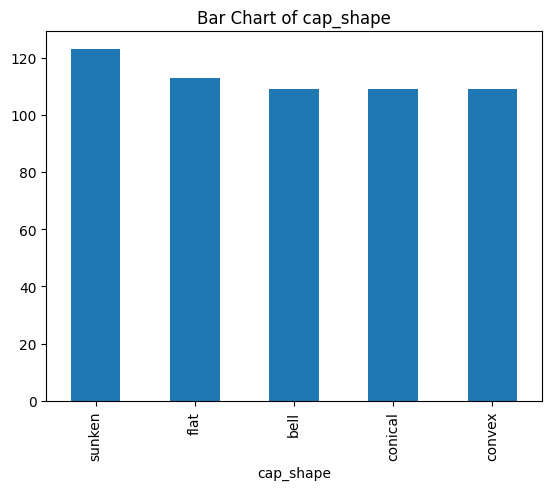

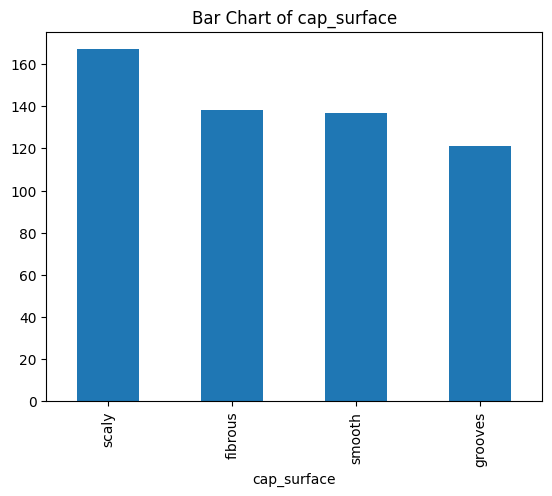

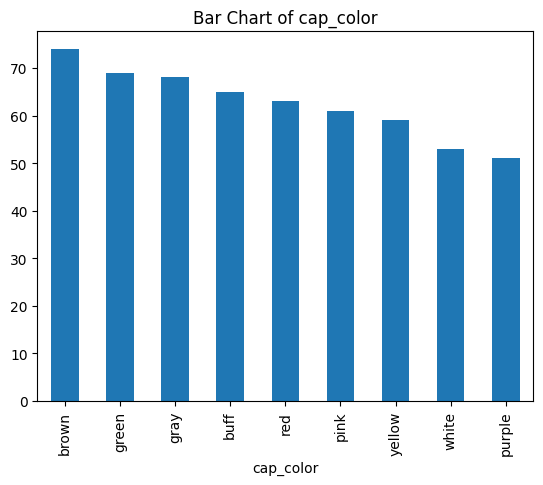

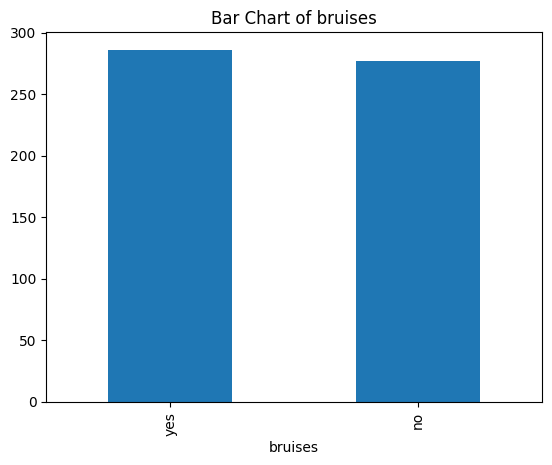

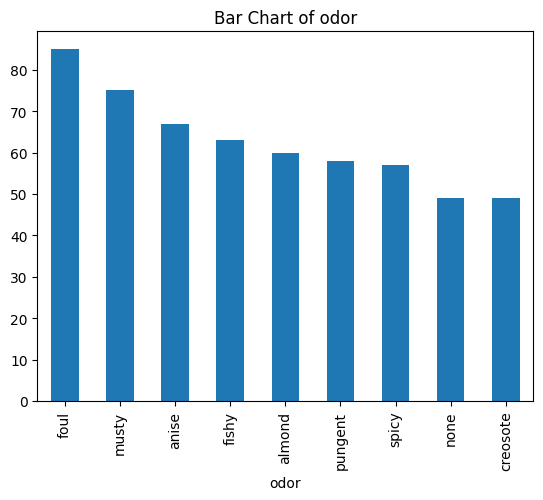

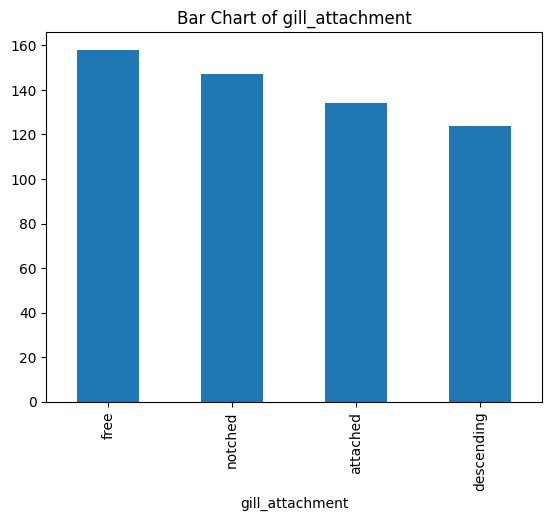

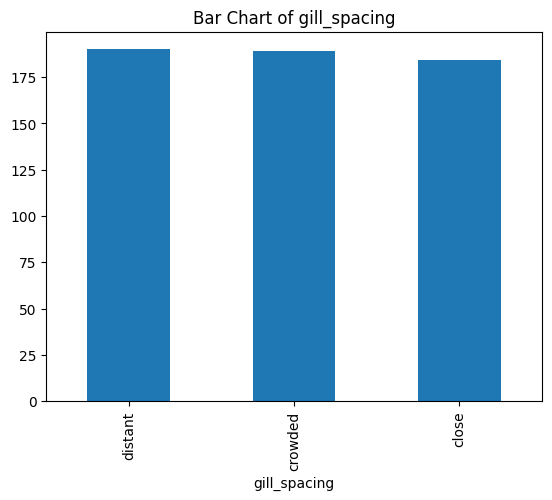

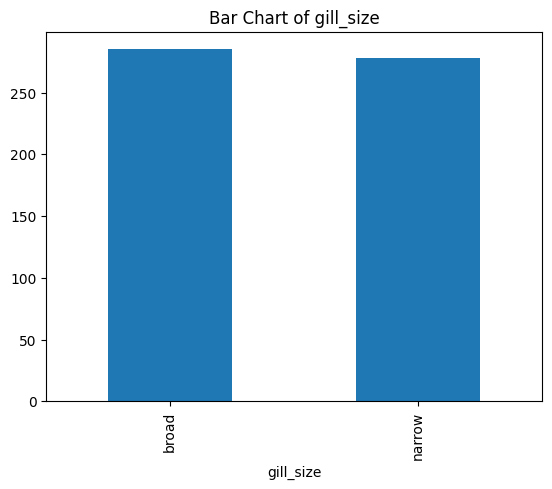

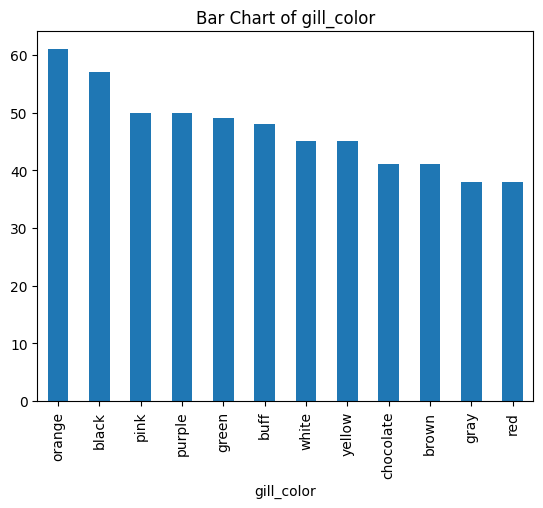

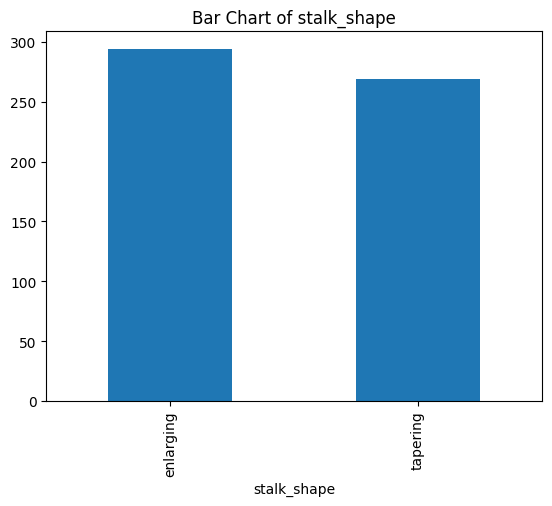

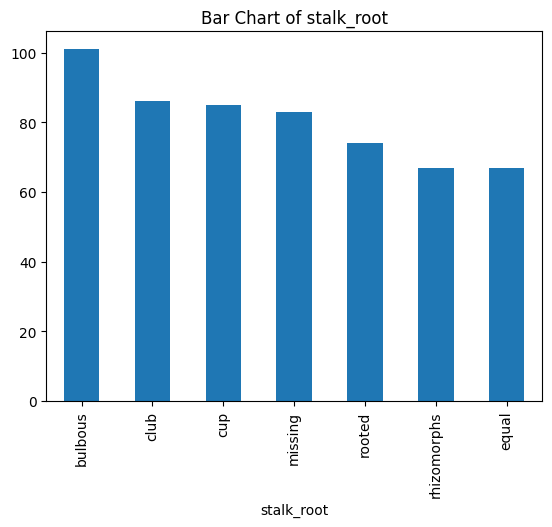

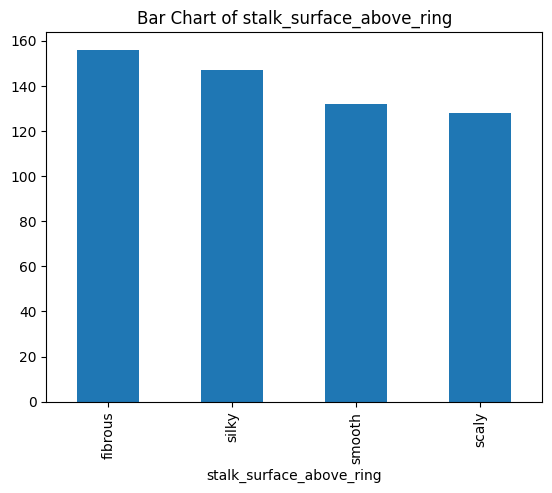

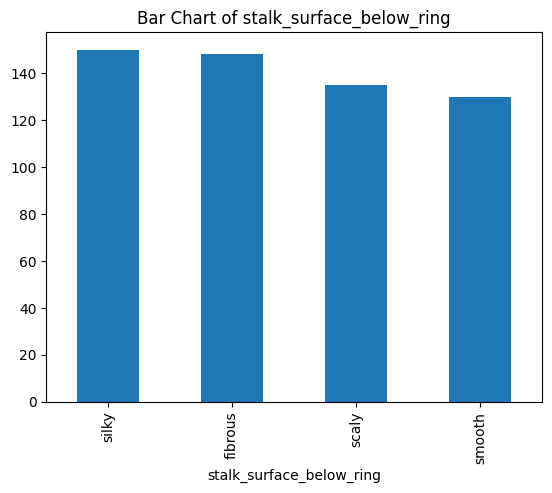

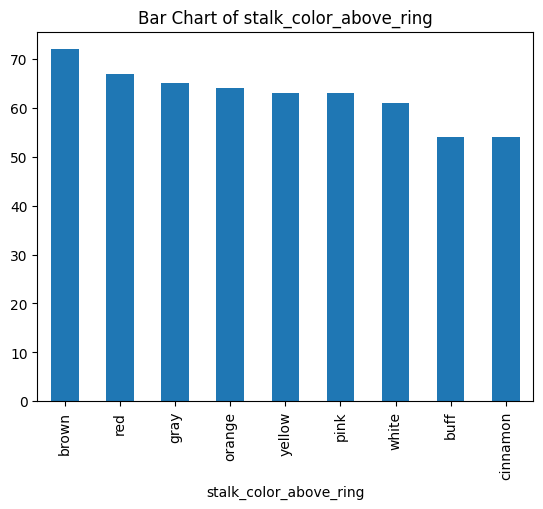

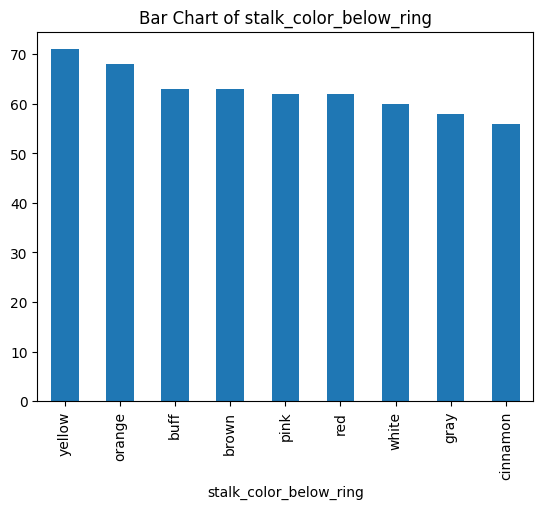

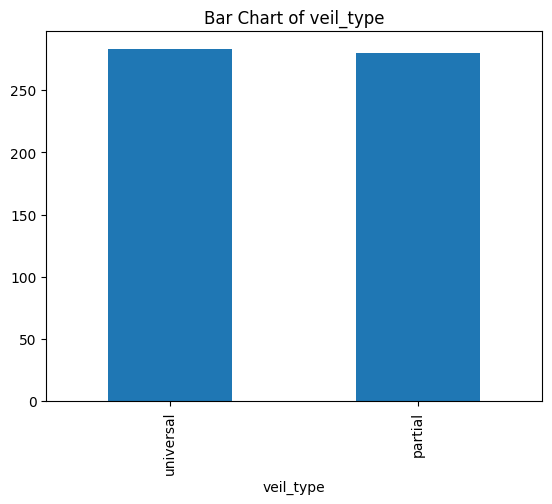

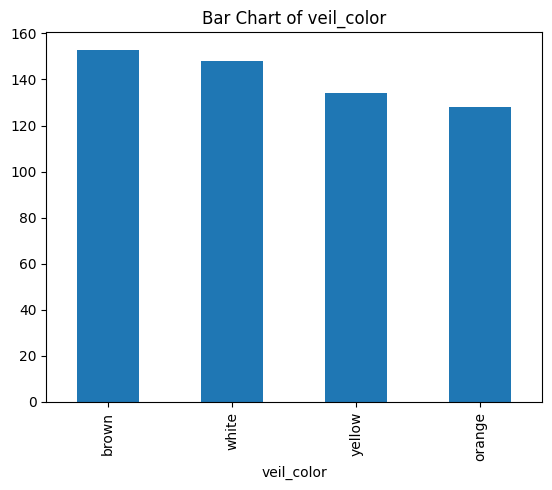

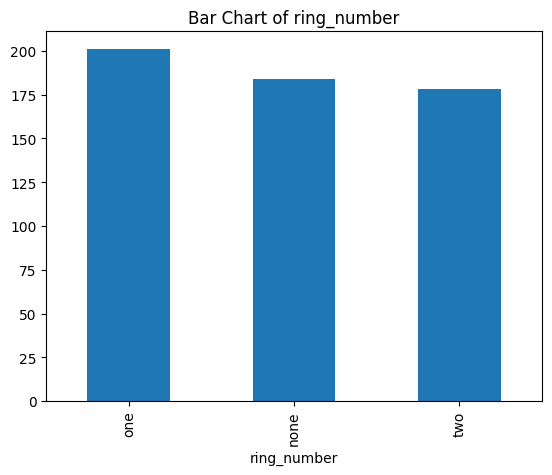

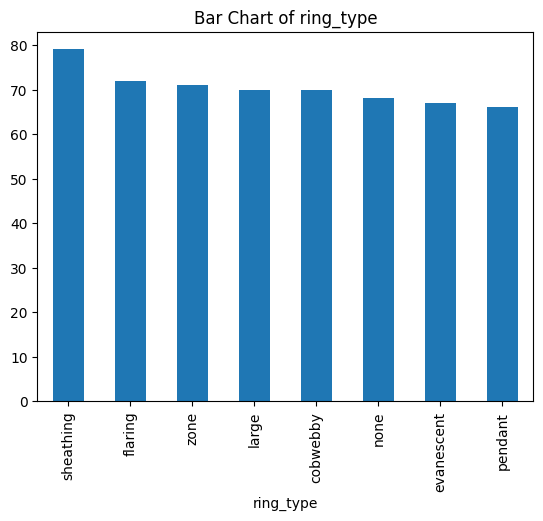

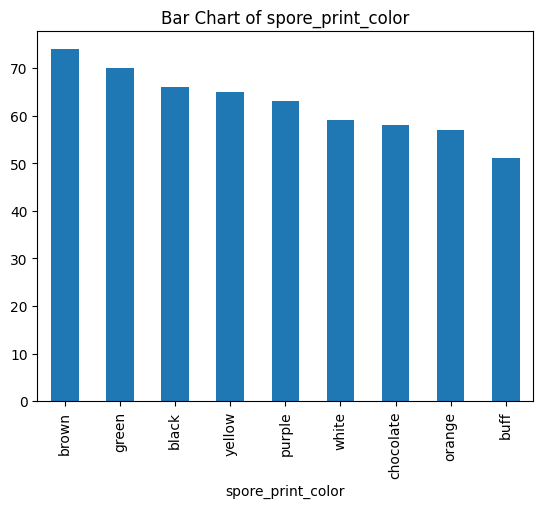

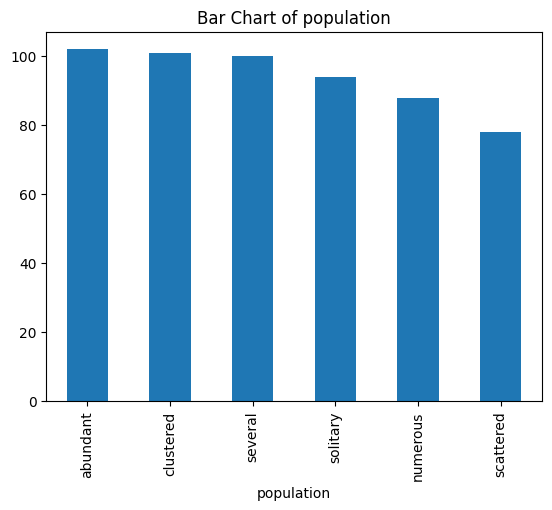

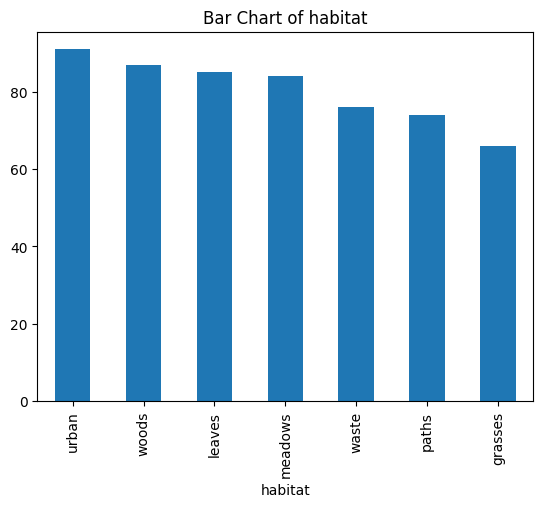

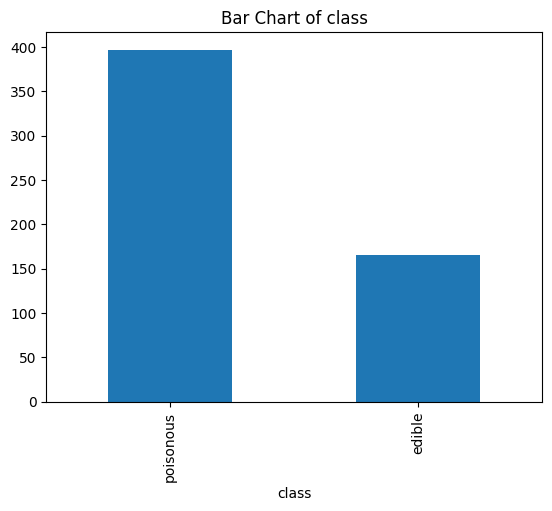

In [15]:
for col in cat_columns:
  mush[col].value_counts().plot(kind='bar')
  plt.xlabel(col)  # Label x-axis with current column name
  plt.title(f'Bar Chart of {col}')  # Dynamic title for each plot
  plt.show()  # Display each plot

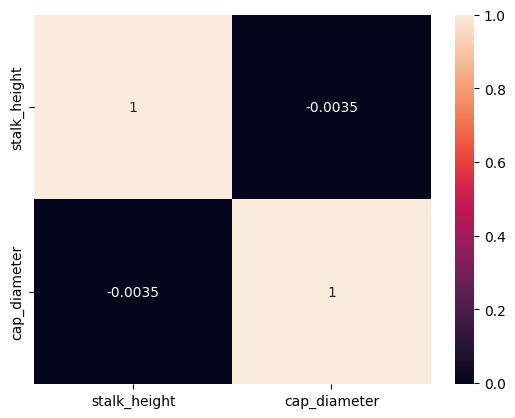

In [16]:
heatmap = sns.heatmap(num_columns.corr(), annot=True)
plt.show()

---
**Data Preprocessing**

In [21]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'cat_columns' is a list of categorical column names
for col in cat_columns:
    le = LabelEncoder()
    mush[col] = le.fit_transform(mush[col])
mush.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,0,3,4,0,4,3,2,0,7,0,...,1,0,1,7,0,3,1,1,5.291009,5.436304
70,4,2,8,0,7,1,2,1,6,0,...,0,2,0,7,7,2,1,1,4.746453,10.769935
76,1,1,0,0,4,2,2,0,10,1,...,0,3,2,3,3,5,6,1,12.206952,5.061715
109,4,3,7,0,1,0,1,0,0,1,...,0,0,2,6,0,5,6,0,13.214007,14.549171
127,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming your data is in a pandas DataFrame named 'df'
X = mush.drop('class', axis=1)  # Features
y = mush['class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
**Data Visualization**

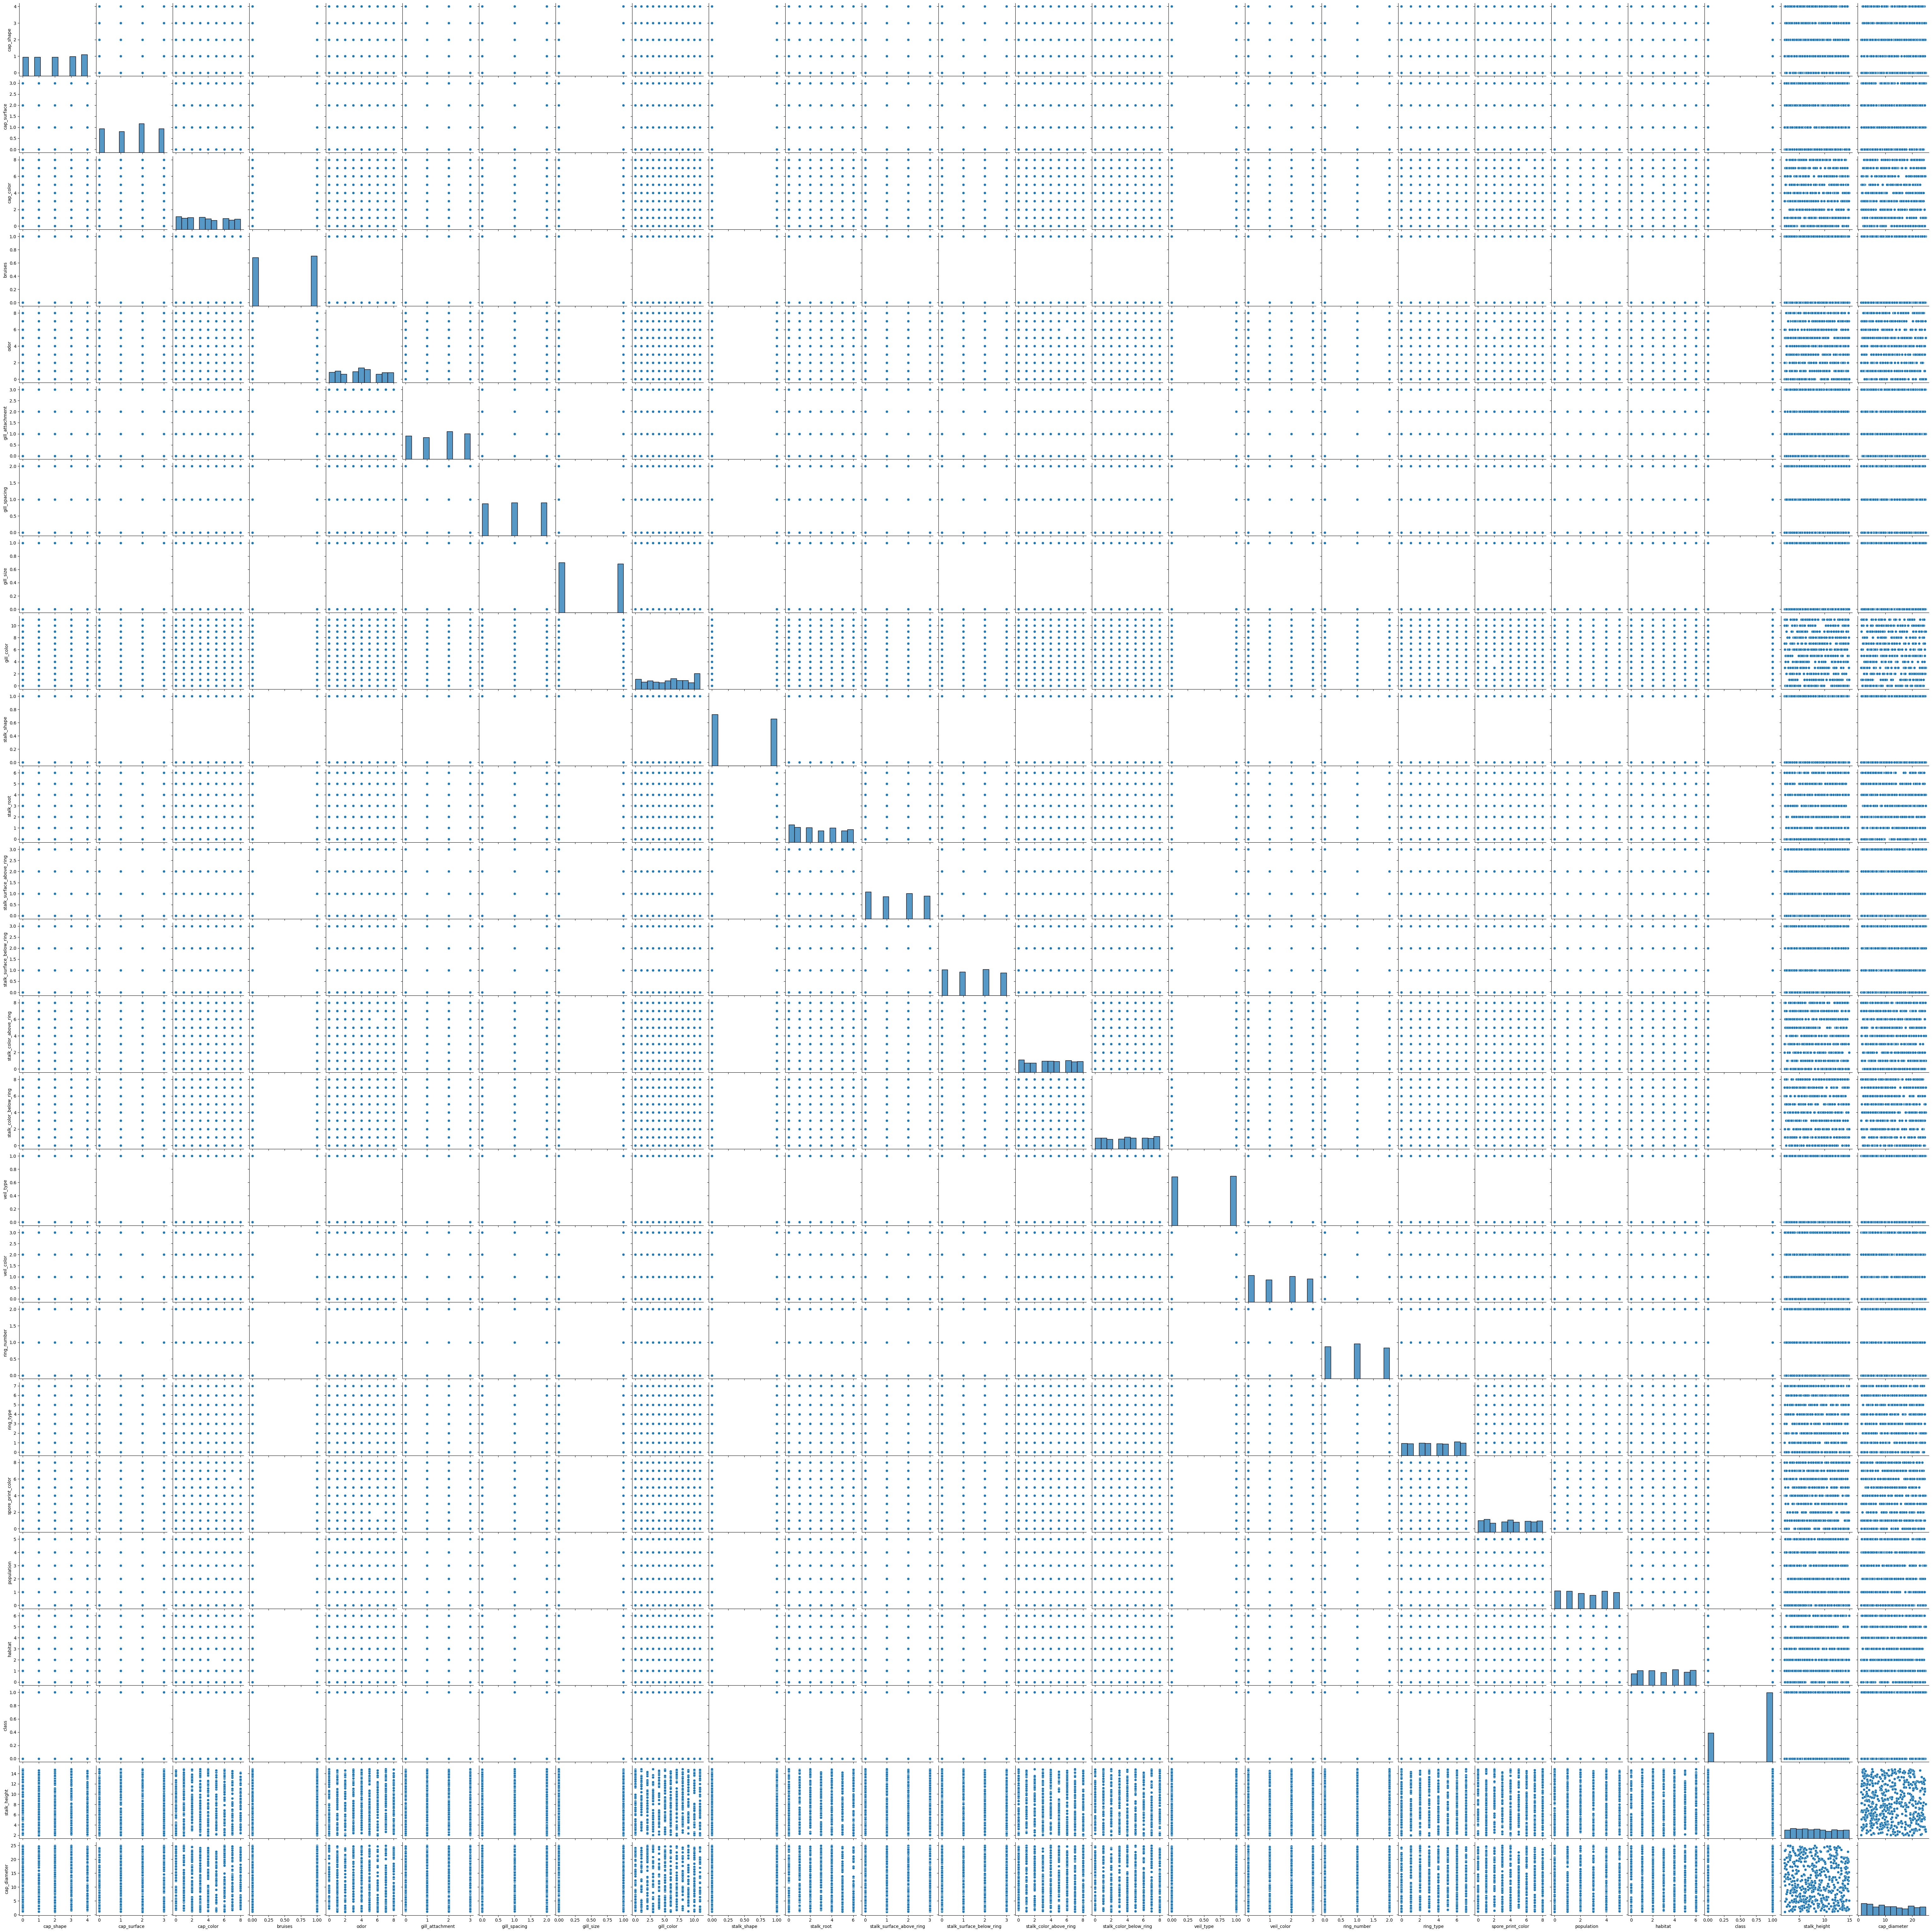

In [23]:
sns.pairplot(mush)
plt.show()

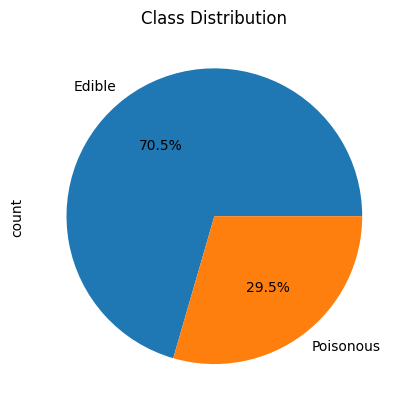

In [27]:
# Create pie chart labels
labels = ['Edible', 'Poisonous']
mush['class'].value_counts().plot.pie(labels=labels,autopct='%1.1f%%')
plt.title('Class Distribution')


plt.show()

---
**SVM Implementation**

In [29]:
# Create an SVM classifier
svm_model = SVC()

# Train the model on the training data
svm_model.fit(X_train, y_train)

SVC()

In [30]:
# Make predictions on the testing data
y_pred = svm_model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7610619469026548
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.76      1.00      0.86        86

    accuracy                           0.76       113
   macro avg       0.38      0.50      0.43       113
weighted avg       0.58      0.76      0.66       113

[[ 0 27]
 [ 0 86]]


---
**Visualization of SVM Results**

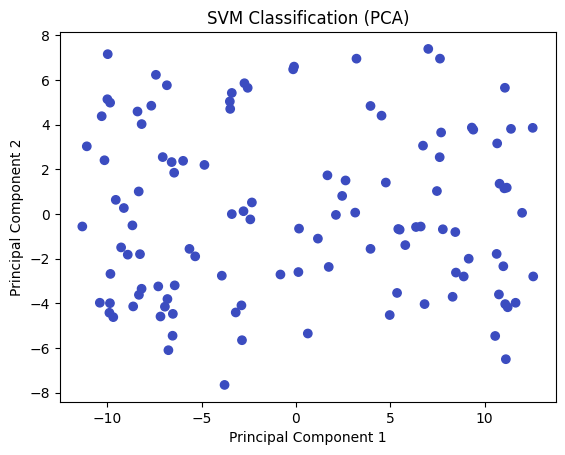

In [31]:
from sklearn.decomposition import PCA

# Reduce the dimensionality to 2D
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred, cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Classification (PCA)')
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 
              'kernel': ['linear', 'poly', 'rbf'],
              'gamma': [0.1, 1, 10]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [35]:
best_params

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [36]:
best_model

SVC(C=0.1, gamma=0.1, kernel='linear')